In [1]:
cd ..

/home/mars/src_aiai


In [2]:
import pickle
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from src.visualisation import compare, print_statistics, plot_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [5]:
data = "SATS"
ISNR = 30

In [6]:
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
    ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

    ("U-net", "unet", "_sigmoid"),
    ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
    ("dU-net", "dunet", "_sigmoid"),
    ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
    ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
    ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
]


In [7]:
results = []
results += [(name, "Train", f"./data/processed/{data}/train_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [(name, "Test", f"./data/processed/{data}/test_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train", "Test"]]
# results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train"]]


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]

In [8]:
statistics = pd.read_csv(f"./results/{data}/statistics.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics.dropna(inplace=True)

In [9]:
# statistics = statistics[statistics.Set == "Train"]

|Name                                    |PSNR                |SSIM                |MSE                 |
|Adjoint_Test                            |   9.240 \pm   1.774|   0.152 \pm   0.035|   0.129 \pm   0.053|
|Adjoint_Train                           |   9.193 \pm   1.767|   0.151 \pm   0.034|   0.130 \pm   0.051|
|U-net_Test                              |  22.566 \pm   2.687|   0.776 \pm   0.089|   0.007 \pm   0.004|
|U-net_Train                             |  22.591 \pm   2.706|   0.777 \pm   0.089|   0.007 \pm   0.004|
|dU-net_Test                             |  19.042 \pm   1.519|   0.742 \pm   0.082|   0.013 \pm   0.004|
|dU-net_Train                            |  19.075 \pm   1.500|   0.743 \pm   0.082|   0.013 \pm   0.005|


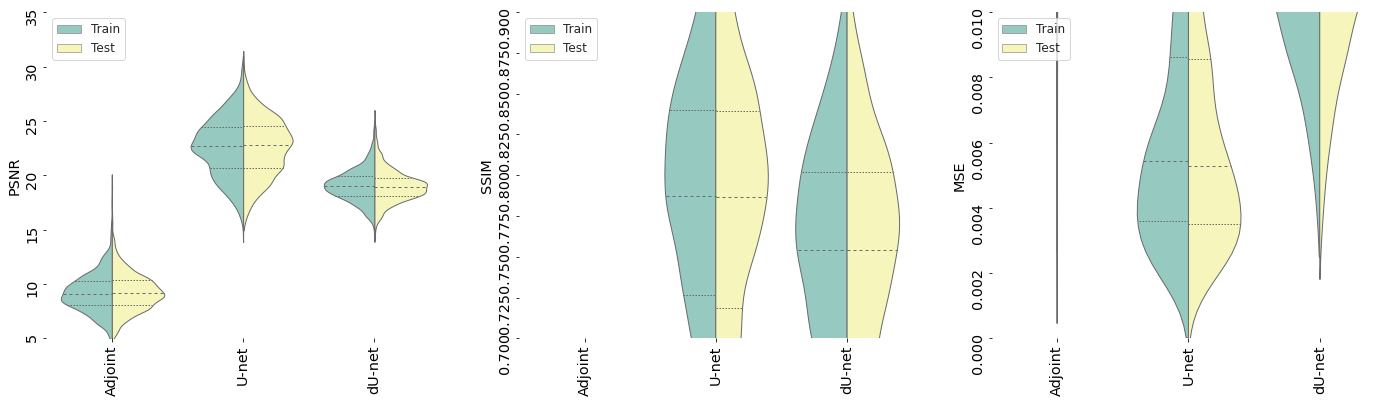

In [10]:
print_statistics(statistics, results, metrics)
plot_statistics(statistics, metrics, ylims=[[5,35], [0.7,0.9], [0,0.01]])

In [11]:
examples = pickle.load(open(f"./results/{data}/examples.pkl", "rb"))

In [12]:
train_ims = []
test_ims = []
train_titles = []
test_titles = []

for name, mode, im in examples:
    if mode == "Train":
        train_ims.append(im)
        train_titles.append(name)
    else:
        test_ims.append(im)
        test_titles.append(name)

In [13]:
train_ims[0].shape

(5, 256, 256)

In [14]:
len(train_ims)

4

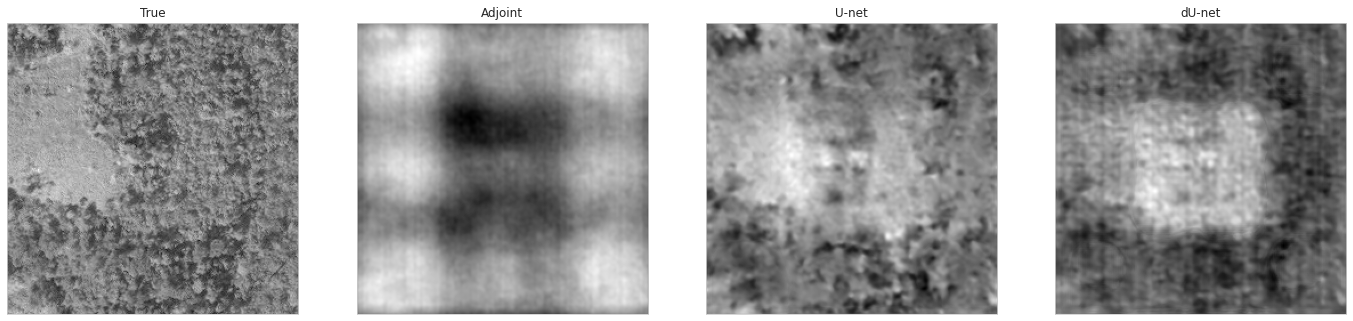

In [15]:
i=0
compare([ims[i] for ims in train_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)

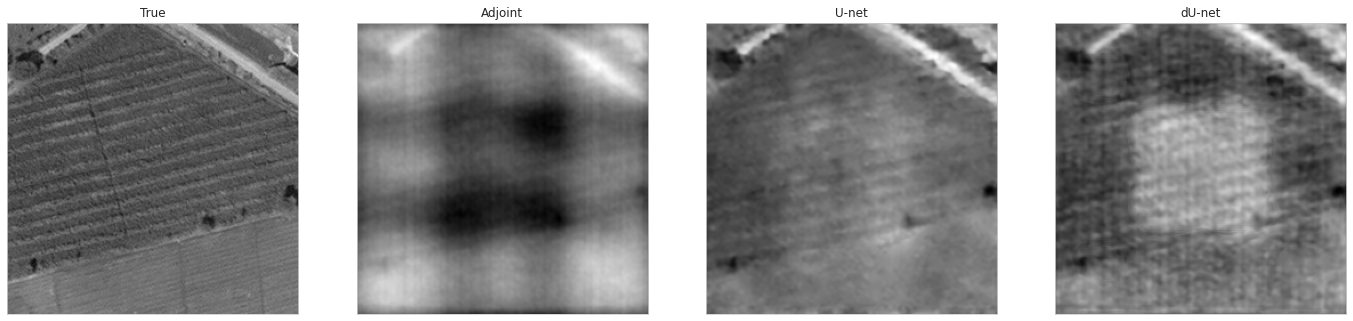

1


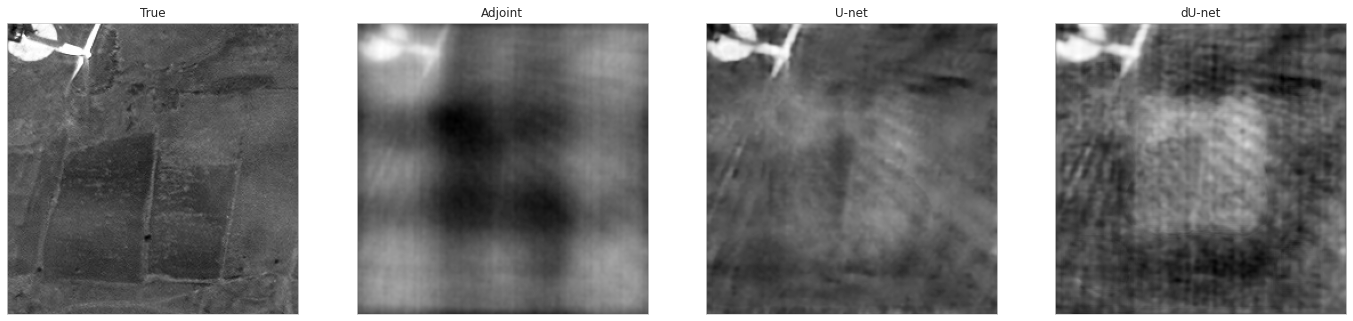

2


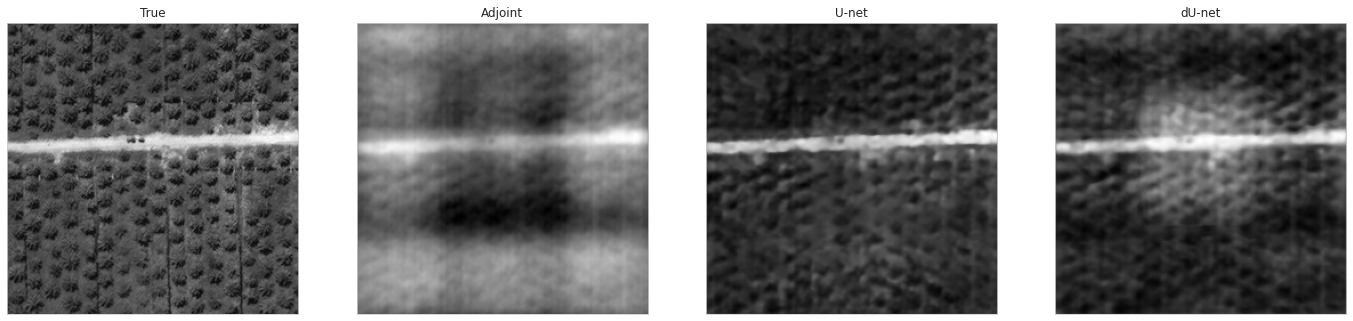

3


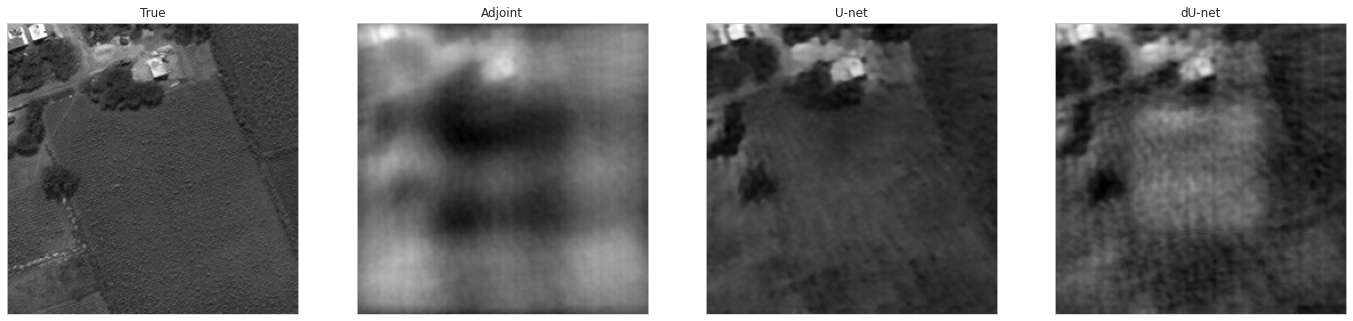

4


In [16]:
for i in range(1,5):
    compare([ims[i] for ims in train_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)
    print(i)

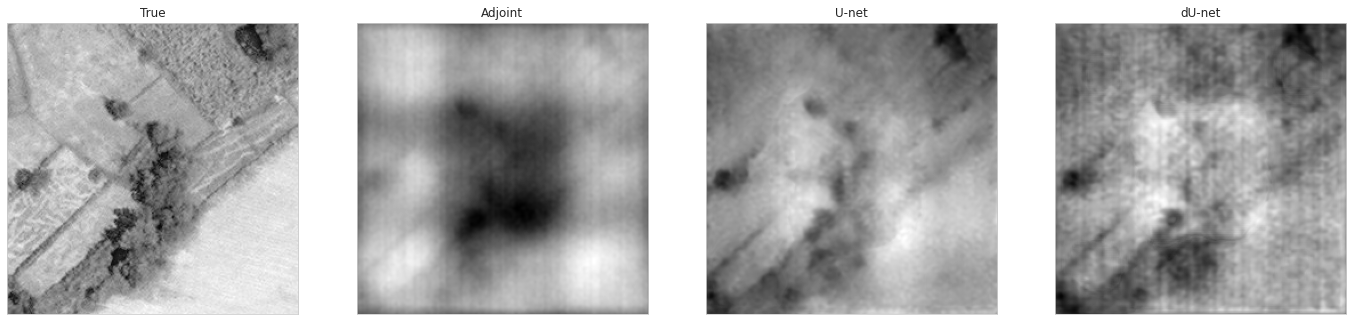

In [17]:
i=0
compare([ims[i] for ims in test_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)

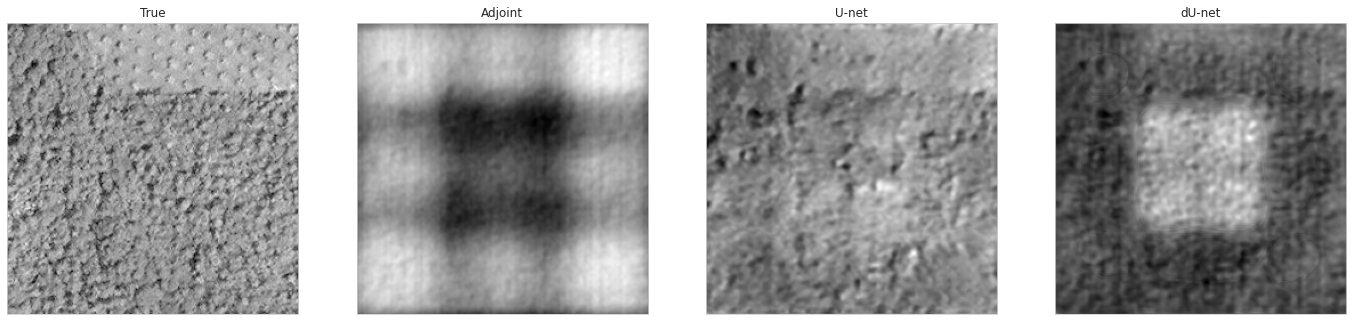

1


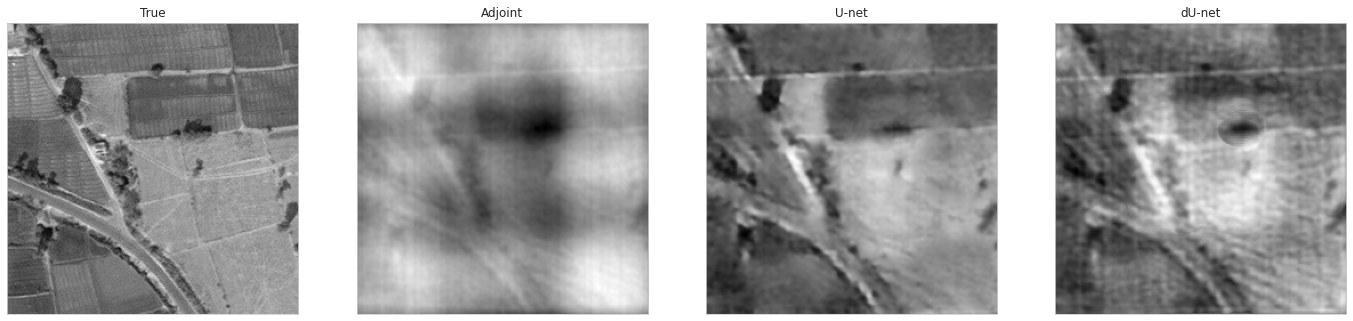

2


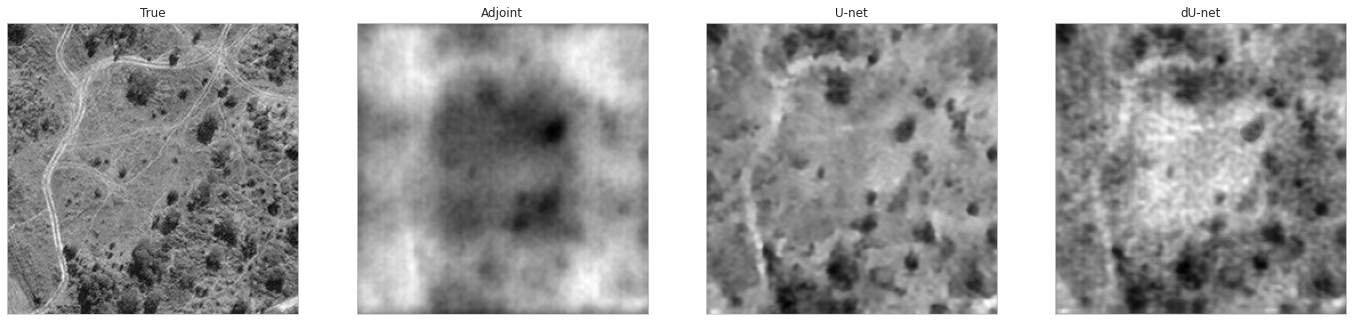

3


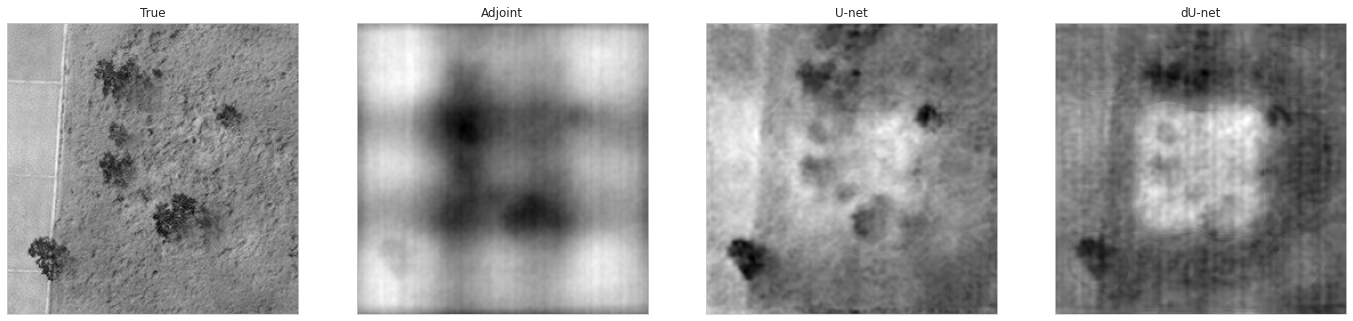

4


In [18]:
for i in range(1,5):
    compare([ims[i] for ims in test_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)
    print(i)